# Agglomerative Clustering

Un inconvénient potentiel du clustering $K$-means est qu'il nous oblige à spécifier à l'avance le nombre de clusters $K$. Le clustering hiérarchique est une approche alternative qui n'exige pas que nous nous engagions à un choix particulier de $K$. 

Une autre manière de considérer le clustering est de reconstruire les relations entre les clusters d'une manière arborescente. Autrement dit, on peut voir le clustering comme un ensemble de méthodes ascendantes qui fusionnent de manière répétée les deux clusters les plus proches en un super-cluster de grande taille, définissant un arbre dont les feuilles sont les éléments individuels et dont la racine définit l'univers.

Le clustering hiérarchique a un avantage supplémentaire par rapport au clustering K-means en ce qu'il résulte en une représentation arborescente attrayante des observations, appelée un dendrogramme. Ce dernier n'est rien d'autre qu'une représentation arborescente des observations, il peut être un outil visuel très pratique pour déterminer le nombre de clusters à prendre et les compositions de clusters qui en résultent.

### Algorithme

Le clustering hiérarchique consiste en une série de fusions d'observations. Elle commence par les observations individuelles, chacune étant traitée comme un cluster distinct, et fusionne successivement les paires de cluster les plus proches, une paire à la fois. Le processus se poursuit de manière itérative jusqu'à ce que tous les clusters soient finalement fusionnés en un seul cluster.

1. Commencez avec $n$ observations et une mesure (telle que la distance euclidienne) de toutes les $\left(\begin{array}{c}n \\ 2\end{array}\right)=n(n-1) / 2$ dissemblances par paire. Traitez chaque observation comme un son propre cluster.

2. Pour $i=n, n-1, \ldots, 2$ :

    (a) Examinez toutes les dissimilarités inter-clusters par paire parmi les $i$ clusters et identifiez la paire de clusters la moins dissemblable (c'est-à-dire la plus similaire). Fusionner ces deux clusters. La dissimilarité entre ces deux clusters indique la hauteur dans le dendrogramme à laquelle la fusion doit être placée.
    
    (b) Calculer les nouvelles dissimilarités inter-clusters par paire parmi les $i-1$ clusters restants.

On comprend donc que le clustering agglomératif renvoie un arbre au-dessus des groupements d'éléments. Après avoir coupé les arêtes les plus longues de cet arbre, il ne reste que les groupes d'éléments disjoints produits par les algorithmes de regroupement comme les k-means. Mais cet arbre est une chose merveilleuse, dont les pouvoirs vont bien au-delà du partitionnement des éléments :

- L'organisation des clusters et des sous-clusters : Chaque nœud interne de l'arbre définit un cluster particulier, composé de tous les éléments du nœud-feuille qui le précèdent. Mais l'arbre décrit la hiérarchie entre ces clusters, des clusters les plus raffinés/spécifiques près des feuilles aux clusters les plus généraux près de la racine. Idéalement, les nœuds d'un arbre définissent des concepts nommables : des regroupements naturels qu'un expert du domaine pourrait expliquer si on le lui demandait. Ces différents niveaux de granularité sont importants, car ils définissent des concepts structurels que nous n'aurions peut-être pas remarqués avant de procéder au clustering.

- Visualisation du processus de clustering : Un dessin de cet arbre d'agglomération nous en dit long sur le processus de clustering, en particulier si le schéma reflète le coût de chaque étape de fusion. Idéalement, il y aura de très longues arêtes près de la racine de l'arbre, montrant que les clusters de plus haut niveau sont bien séparés et appartiennent à des groupements distincts. Nous pouvons dire si les groupements sont équilibrés, ou si les groupements de haut niveau sont de tailles sensiblement différentes. De longues chaînes de fusion de petits groupes en un grand groupe sont généralement un mauvais signe, bien que le choix des critères de fusion (qui sera discuté ci-dessous) puisse biaiser la forme de l'arbre. Les valeurs aberrantes apparaissent joliment sur un arbre, sous la forme d'éléments uniques ou de petits clusters reliés à la racine par de longues arêtes.

- Classification efficace des nouveaux éléments : Une application importante du clustering est la classification. Supposons que nous ayons regroupé de manière agglomérative les produits d'un magasin, pour construire une taxonomie de clusters. Maintenant, une nouvelle pièce arrive. Dans quelle catégorie faut-il le classer ?

- Classification efficace des nouveaux éléments : Une application importante du clustering est la classification. Supposons que nous ayons regroupé de manière agglomérative les produits d'un magasin, pour construire une taxonomie de clusters. Maintenant, une nouvelle pièce arrive. Dans quelle catégorie faut-il le classer ?


-    Pour les k-means, chacune des $c$ cluster est classée par son centroïde, de sorte que la classification d'un nouvel élément $q$ se réduit à calculer la distance entre $q$ et tous les c centroïdes pour identifier la grappe la plus proche. Un arbre hiérarchique offre une méthode potentiellement plus rapide. Supposons que nous ayons précalculé les centroïdes de toutes les feuilles des sous-arbres gauche et droit sous chaque nœud. L'identification de la bonne position dans la hiérarchie pour un nouvel élément $q$ commence par la comparaison de $q$ aux centroïdes des sous-arbres gauche et droit de la racine. Le plus proche des deux centroïdes de $q$ définit le côté approprié de l'arbre, nous reprenons donc la recherche à cet endroit, un niveau plus bas. Cette recherche prend un temps proportionnel à la hauteur de l'arbre, au lieu du nombre de feuilles.


Les arbres de fusion binaires peuvent être tracés de nombreuses manières différentes qui reflètent exactement la même structure, car il n'y a pas de notion implicite de ce qui est le descendant (dans l'arbre) gauche et de ce qui est le descendant droit.

Afin de mieux comprendre cet enjeux, regardons un exemple simple;

In [3]:
import pandas as pd
d = {'x_Coordinate' : [0.4,0.22,0.35,0.26,0.08,0.45],
     'y_Coordinate' : [0.53,0.38,0.32,0.19,0.41,0.3],
     'Points' : ["p1","p2","p3","p4","p5","p6"]}
df_h=pd.DataFrame(d)
df_h

x_Coordinate  y_Coordinate Points
0          0.40          0.53     p1
1          0.22          0.38     p2
2          0.35          0.32     p3
3          0.26          0.19     p4
4          0.08          0.41     p5
5          0.45          0.30     p6

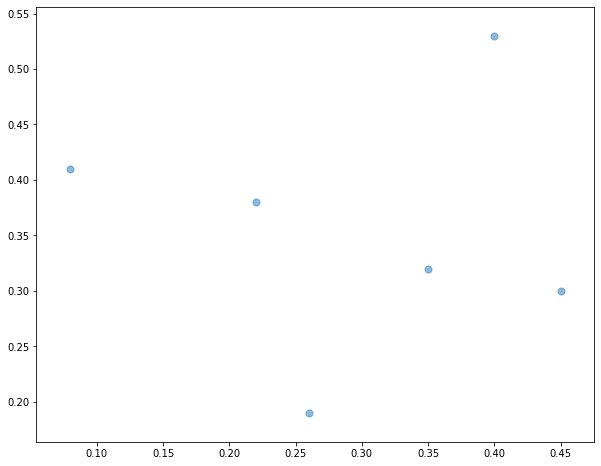

In [4]:
import matplotlib.pyplot as plt
x=df_h.x_Coordinate
y=df_h.y_Coordinate
n=df_h.Points
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y,s=50, alpha=0.5);

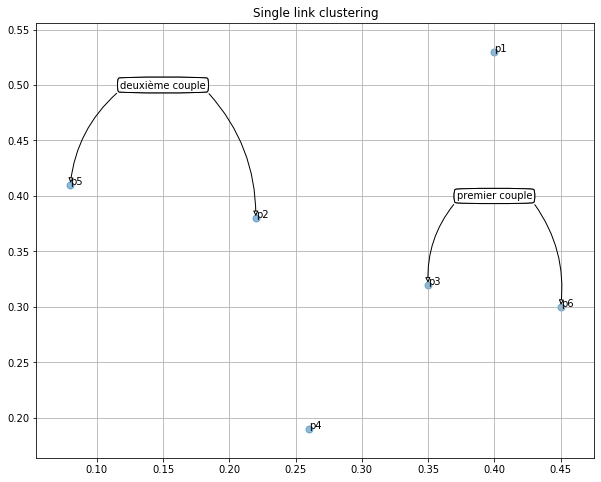

In [5]:
x=df_h.x_Coordinate
y=df_h.y_Coordinate
n=df_h.Points
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y,s=50, alpha=0.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
plt.grid(True)

ann = ax.annotate("premier couple",
                  xy=(0.35 , .32), xycoords='data',
                  xytext=(0.4, 0.4), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("premier couple",
                  xy=(0.45, 0.3), xycoords='data',
                  xytext=(0.4, 0.4), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(1., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("deuxième couple",
                  xy=(0.08,0.41), xycoords='data',
                  xytext=(0.15, 0.5), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("deuxième couple",
                  xy=(0.22,0.38), xycoords='data',
                  xytext=(0.15, 0.5), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(1., 0.),
                                  fc="w"), 
                  )
 
plt.title("Single link clustering")
plt.show()

## Question

Est-ce que la distance entre le couple $\{3,6\}$ est plus petite que la distance entre les deux point $\{5,2\}$? Autrement dit, peut-on former un cluster avec le couple $\{3,6\}$ et le point $\{4\}$ avant de former le cluster formé par le couple $\{5,2\}$?

## Dissimilarité inter-clusters. 

L'algorithme de base du clustering agglomératif est suffisamment simple pour être décrit en deux phrases. Initialement, chaque élément est affecté à son propre cluster. Fusionnez les deux clusters les plus proches en un seul en plaçant une racine sur eux, et répétez jusqu'à ce qu'il ne reste qu'un seul cluster.


Il ne reste plus qu'à spécifier comment calculer la distance entre les clusters. Lorsque les clusters contiennent des éléments uniques, la réponse est simple : utilisez votre métrique de distance préférée comme $\ell_2$. Mais il existe plusieurs réponses raisonnables pour la distance entre deux clusters non triviaux, qui conduisent à des arbres différents sur la même entrée, et peuvent avoir un impact profond sur la forme des clusters résultants.

La notion de distance entre deux clusters, dont l'un comporte plus d'une observation, est un peu plus ambiguë et repose sur la fonction de liaison utilisée, qui fait référence à la dissimilarité entre deux groupes d'observations. Les quatre types de fonctions de liaison les plus courants sont les suivants :

### Nearest neighbor (single link):

Ici, la distance entre les clusters $C_1$ et $C_2$ est définie par la paire de points la plus proche les reliant :

$$d\left(C_{1}, C_{2}\right)=\min _{x \in C_{1}, y \in C_{2}}\|x-y\|$$

L'utilisation de cette métrique est appelée clustering à lien unique (ou _single link_), car la décision de fusionner est basée uniquement sur le lien unique le plus proche entre les clusters.

<img src="../images/single_link.png" alt="grad_desc" class="responsive" width="40%" height="auto" class="center">

### Average link : 

Ici, nous calculons la distance entre toutes les paires de points de jonction des clusters, et nous en faisons la moyenne pour un critère de fusion plus robuste que le lien unique :

$$d\left(C_{1}, C_{2}\right)=\frac{1}{\left|C_{1}\right|\left|C_{2}\right|} \sum_{x \in C_{1}} \sum_{y \in C_{2}}\|x-y\|$$

<img src="../images/average_link.png" alt="grad_desc" class="responsive" width="40%" height="auto" class="center">

Cela ajoute un peu de robustesses à par rapport au lien unique, mais à un coût de calcul plus élevé.

### Nearest centroid (Centroïde le plus proche ):

Ici, nous maintenons le centroïde de chaque cluster, et nous fusionnons le cluster-pair avec les centroïdes les plus proches. 

$$D\left(c_{1}, c_{2}\right)=D\left(\left(\frac{1}{\left|c_{1}\right|} \sum_{x \in c_{1}} \vec{x}\right),\left(\frac{1}{\left|c_{2}\right|} \sum_{x \in c_{2}} \vec{x}\right)\right)$$

<img src="../images/centroide.png" alt="grad_desc" class="responsive" width="40%" height="auto" class="center">

Cette méthode présente deux principaux avantages. Premièrement, elle tend à produire des clusters similaires au lien moyen, car les observations aberrantes d'un cluster sont dominés lorsque la taille du cluster (nombre de points) augmente. Deuxièmement, il est beaucoup plus rapide de comparer les centroïdes des deux clusters que de tester toutes les paires de points $\left|C_{1}\right|\left|C_{2}\right|$  dans l'implémentation la plus simple. Bien sûr, les centroïdes ne peuvent être calculés que pour les enregistrements ayant toutes les valeurs numériques, mais l'algorithme peut être adapté pour utiliser le point le plus central de chaque cluster (médioïde) comme représentant dans le cas général.

### Complete link

Aussi appelé _Furthest link_. Ici, le coût de la fusion de deux clusters est la paire de points la plus éloignée entre eux :

$$d\left(C_{1}, C_{2}\right)=\max _{x \in C_{1}, y \in C_{2}}\|x-y\|$$

Cela permet de pénaliser les fusions avec des éléments aberrants éloignés.

<img src="../images/complete_linkage.png" alt="grad_desc" class="responsive" width="50%" height="auto" class="center">

Lequel d'entre eux est le meilleur ? Comme toujours dans ce domaine, cela dépend. Pour les très grands ensembles de données, nous sommes plus soucieux d'utiliser les algorithmes les plus rapides, qui sont généralement le lien simple ou le centroïde le plus proche avec des structures de données appropriées. Pour les ensembles de données de taille petite à modeste, nous sommes surtout préoccupés par la qualité, ce qui rend les méthodes plus robustes intéressantes.